# Introduction
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

# Our Goal
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
data_info.loc['dti']['Description']

'A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.'

In [5]:
def fetch_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
fetch_info('mort_acc')

Number of mortgage accounts.


In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


<Axes: xlabel='loan_status', ylabel='count'>

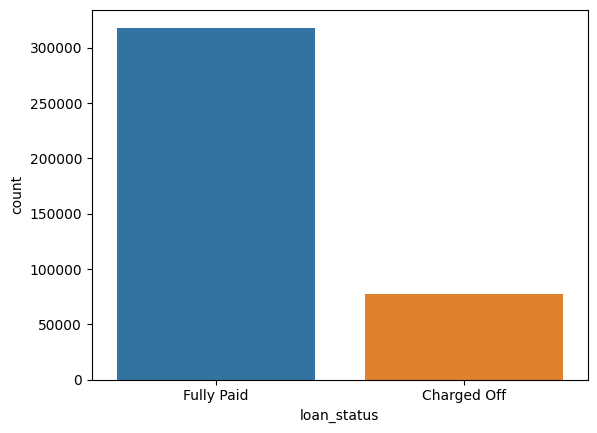

In [10]:
sns.countplot(data=df,x='loan_status')

In [11]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [12]:
fetch_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [13]:
corr_df=df[['loan_amnt','int_rate','installment','annual_inc','dti','open_acc', "pub_rec",'total_acc','mort_acc',
    'pub_rec_bankruptcies']].corr()

<Axes: >

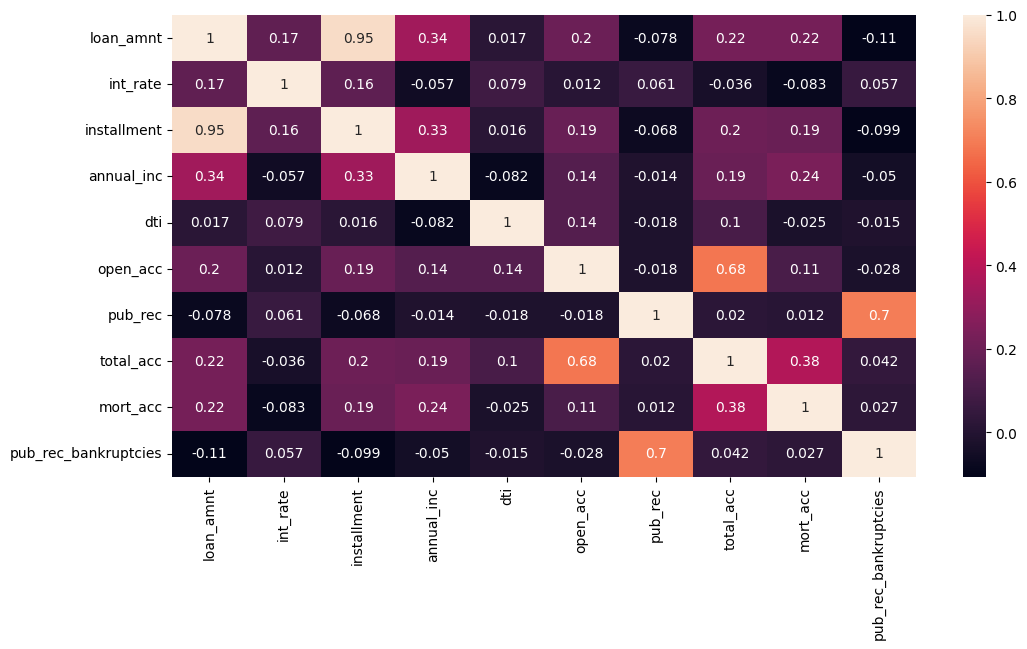

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(corr_df,annot=True,cbar='coolwarm')

(0.0, 45000.0)

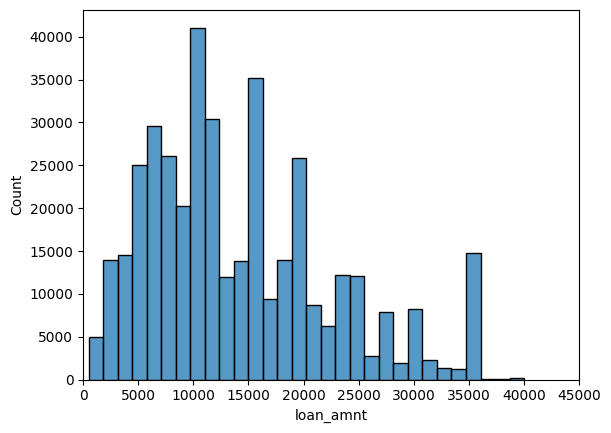

In [15]:
sns.histplot(data=df,x='loan_amnt',bins=30)
plt.xlim(0,45000)

In [16]:
fetch_info('installment')

The monthly payment owed by the borrower if the loan originates.


<Axes: xlabel='loan_amnt', ylabel='installment'>

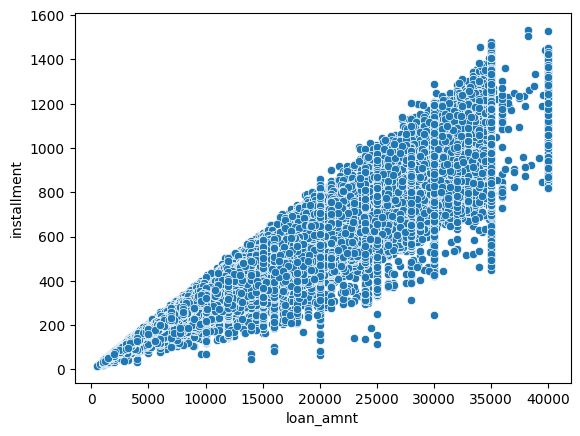

In [17]:
sns.scatterplot(data=df,x='loan_amnt',y='installment')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

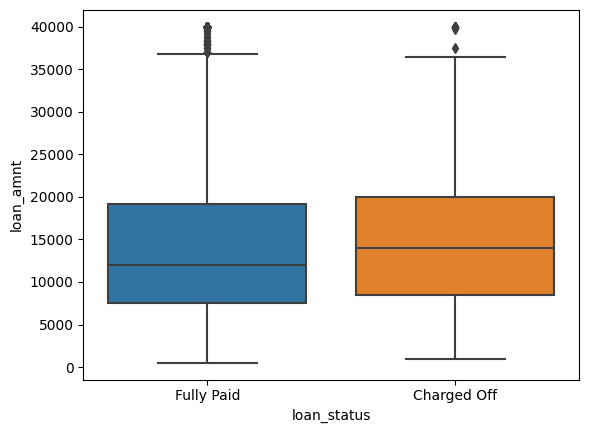

In [18]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt')

In [19]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [20]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [21]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

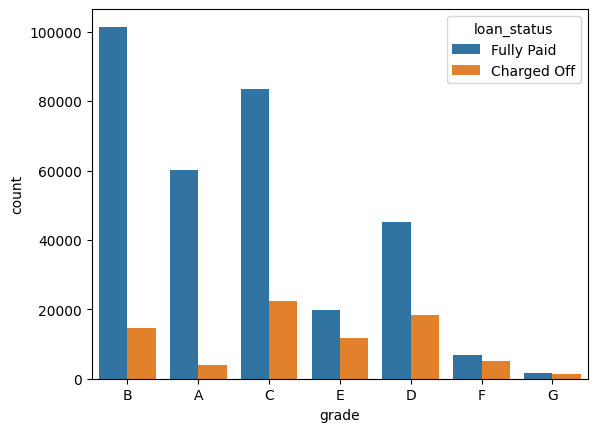

In [22]:
sns.countplot(data=df,x='grade',hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

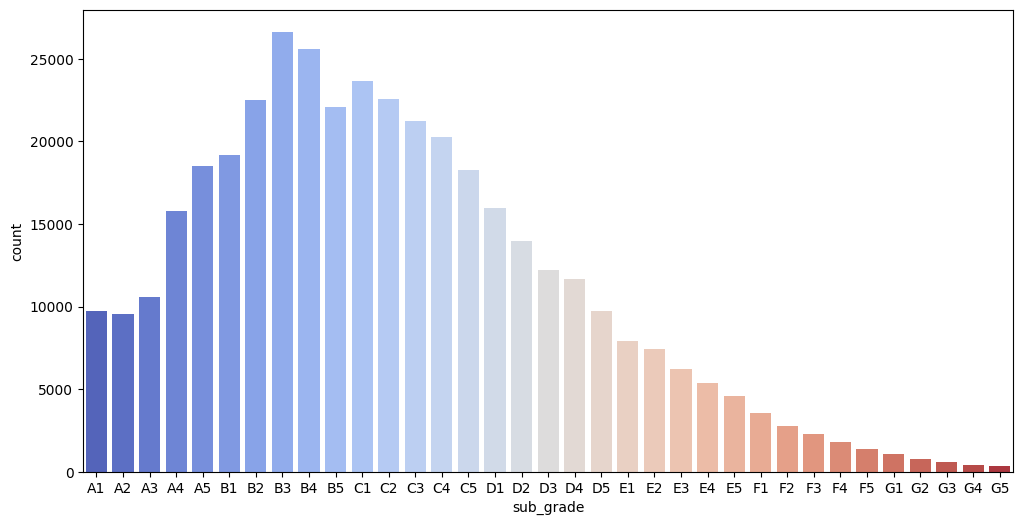

In [23]:
plt.figure(figsize=(12,6))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(data=df,x='sub_grade',order=subgrade_order,palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

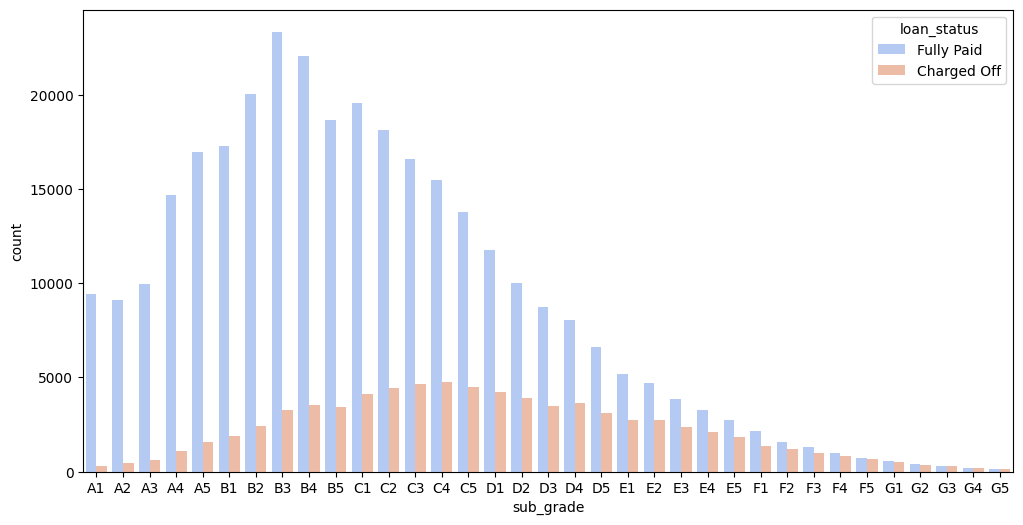

In [24]:
plt.figure(figsize=(12,6))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(data=df,x='sub_grade',order=subgrade_order,palette='coolwarm',hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

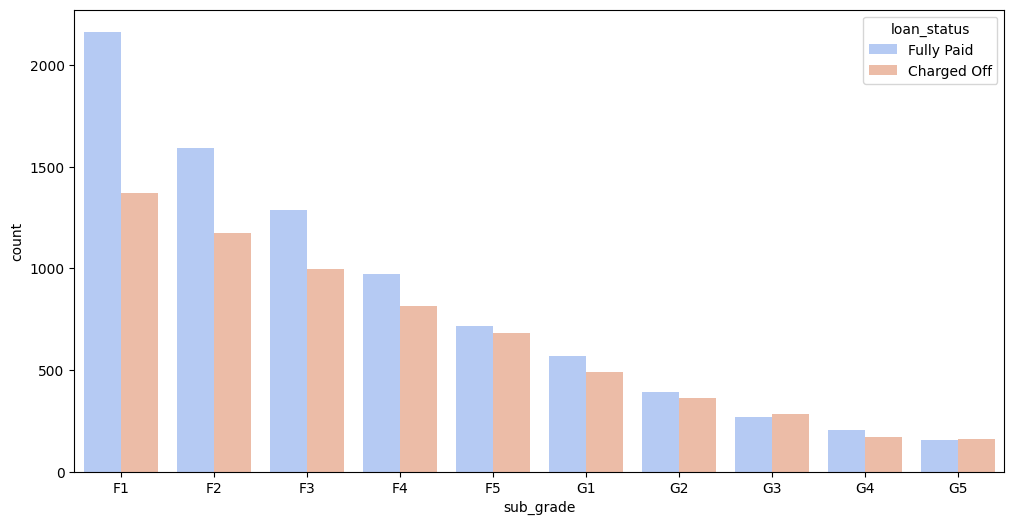

In [25]:
plt.figure(figsize=(12,6))
f_and_g_df=df[(df['grade']=='F') | (df['grade']=='G') ]
subgrade_order=sorted(f_and_g_df['sub_grade'].unique())
sns.countplot(data=f_and_g_df,x='sub_grade',order=subgrade_order,palette='coolwarm',hue='loan_status')

In [26]:
df['loan_repaid']=df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)

In [27]:
df[['loan_status','loan_repaid']].head()

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0


<Axes: >

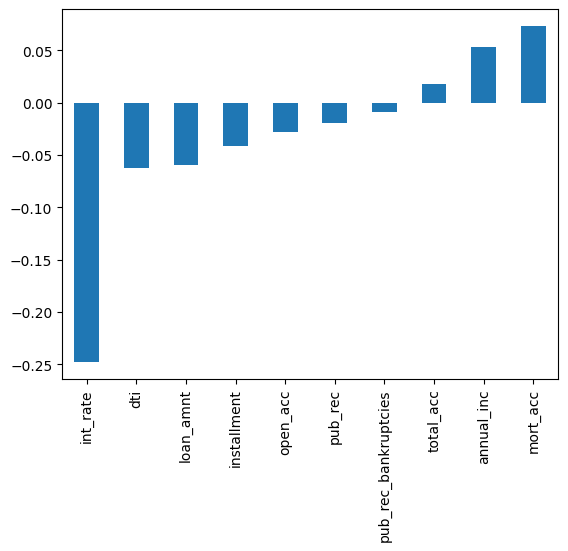

In [28]:
corr_with_loan_repaid=df[['loan_amnt','int_rate','installment','annual_inc','dti','open_acc', "pub_rec",'total_acc','mort_acc',
    'pub_rec_bankruptcies','loan_repaid']].corr()['loan_repaid'].sort_values()[:-1]
corr_with_loan_repaid.plot(kind="bar")

In [29]:
len(df)

396030

In [30]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [31]:
len(df['emp_title'].unique())

173106

In [32]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [33]:
df.drop('emp_title',axis=1,inplace=True)

In [34]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

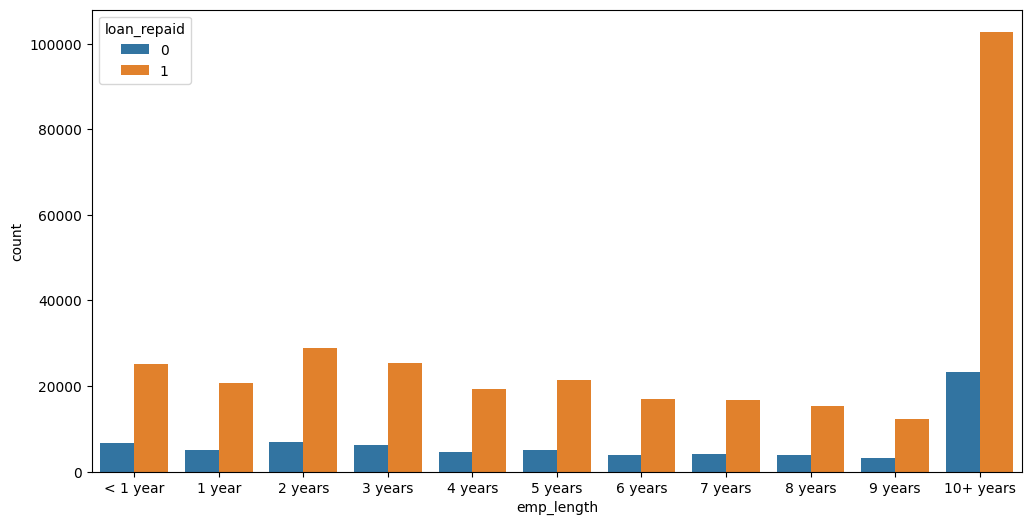

In [35]:
plt.figure(figsize=(12,6))

sns.countplot(df,x="emp_length",order=emp_length_order,hue='loan_repaid')

In [36]:
emp_length_order

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

In [37]:
charged_off_persent=[]
for i in emp_length_order:
    x=len(df[(df['emp_length']==i) & (df['loan_repaid']==0)])
    y=len(df[(df['emp_length']==i)])
    charged_off_persent.append( 100*x/y)

In [38]:
charged_off_persent

[20.68715524034673,
 19.913453365273163,
 19.32620649231027,
 19.52313279646297,
 19.238476953907817,
 19.218720513304397,
 18.919437646945923,
 19.47740045151064,
 19.976001669449083,
 20.04701580253363,
 18.418609817440355]

In [39]:
charged_off_persent_series=pd.Series(index=emp_length_order,data=charged_off_persent)

<Axes: >

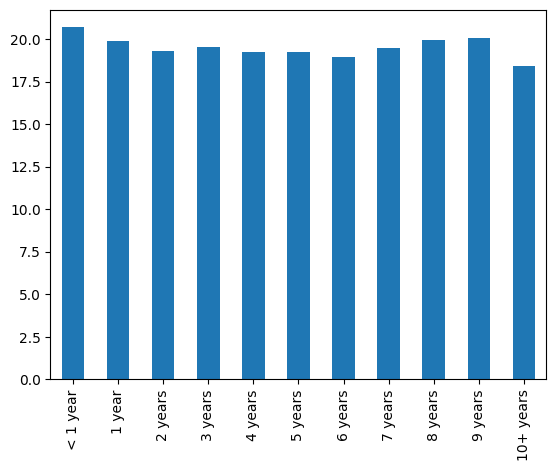

In [40]:
charged_off_persent_series.plot(kind="bar")

In [41]:
df.drop('emp_length',axis=1,inplace=True)

In [42]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [43]:
df[['title','purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


In [44]:
df.drop('title',axis=1,inplace=True)

In [45]:
fetch_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [46]:
df.drop('revol_util',axis=1,inplace=True)
df.drop('pub_rec_bankruptcies',axis=1,inplace=True)

In [47]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
application_type           0
mort_acc               37795
address                    0
loan_repaid                0
dtype: int64

# filling up of null values in mort_acc

In [48]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [49]:
corr_with_mort_acc=df[['loan_amnt','int_rate','installment','annual_inc','dti','open_acc', "pub_rec",'total_acc','mort_acc',
    'loan_repaid']].corr()['mort_acc'].sort_values()[:-1]
corr_with_mort_acc

int_rate      -0.082583
dti           -0.025439
pub_rec        0.011552
loan_repaid    0.073111
open_acc       0.109205
installment    0.193694
loan_amnt      0.222315
annual_inc     0.236320
total_acc      0.381072
Name: mort_acc, dtype: float64

In [50]:
fetch_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [51]:
df['total_acc'].value_counts()

total_acc
21.0     14280
22.0     14260
20.0     14228
23.0     13923
24.0     13878
         ...  
110.0        1
129.0        1
135.0        1
104.0        1
103.0        1
Name: count, Length: 118, dtype: int64

In [52]:
total_acc_avg=df[['total_acc','mort_acc']].groupby('total_acc').mean()['mort_acc']

In [53]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [54]:
total_acc_avg[6.0]      # as a series object

0.15129310344827587

In [55]:
def func(total_acc,mort_acc):
    if np.isnan(mort_acc) :
        return(total_acc_avg[total_acc])
    else:
        return (mort_acc)
        

In [56]:
df['mort_acc']=df.apply(lambda x: func(x['total_acc'],x['mort_acc']), axis=1)


In [57]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

In [58]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [59]:
df['term'].value_counts()

term
 36 months    302005
 60 months     94025
Name: count, dtype: int64

In [60]:
fetch_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [61]:
df['term']=df['term'].astype('str').apply(lambda x : int(x[:3]))
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 396030, dtype: int64

In [62]:
df.drop('grade',axis=1,inplace=True)

In [63]:
subgrade_dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

In [64]:
df=pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [65]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [66]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

**'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'**

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory I wouldn't have an issue_date, so droped this feature.

In [67]:
df['issue_d'].value_counts()      

issue_d
Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: count, Length: 115, dtype: int64

In [68]:
df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [69]:
df.drop(['issue_d','loan_status'],axis=1,inplace=True)

In [70]:
df[ 'earliest_cr_line'].value_counts()     

earliest_cr_line
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64

In [71]:
df['earliest_cr_year']=df[ 'earliest_cr_line'].apply(lambda x:int(x[4:]))

In [72]:
df['home_ownership'].replace(['NONE','ANY'],'OTHER',inplace=True)
df['home_ownership'].value_counts()      # will transform it to dummy

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [73]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [74]:
df['purpose'].value_counts()                        # will transform it to dummy

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [75]:
df['initial_list_status'].value_counts()        # will transform it to dummy

initial_list_status
f    238066
w    157964
Name: count, dtype: int64

In [76]:
df['application_type'].value_counts()           # will transform it to dummy

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [77]:
df['verification_status'].value_counts()     # will transform it to dummy

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

In [78]:
df['address'].value_counts()       

address
USCGC Smith\nFPO AE 70466                           8
USS Johnson\nFPO AE 48052                           8
USNS Johnson\nFPO AE 05113                          8
USS Smith\nFPO AP 70466                             8
USNS Johnson\nFPO AP 48052                          7
                                                   ..
455 Tricia Cove\nAustinbury, FL 00813               1
7776 Flores Fall\nFernandezshire, UT 05113          1
6577 Mia Harbors Apt. 171\nRobertshire, OK 22690    1
8141 Cox Greens Suite 186\nMadisonstad, VT 05113    1
787 Michelle Causeway\nBriannaton, AR 48052         1
Name: count, Length: 393700, dtype: int64

Let's feature engineer a zip code column from the address in the data set.

In [79]:
df['zipcode']=df['address'].apply(lambda x:(x[-5:]))     # will transform it to dummy
df.drop('address',axis=1,inplace=True)
df['zipcode']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zipcode, Length: 396030, dtype: object

In [80]:
dummies=pd.get_dummies(df[['zipcode','verification_status','application_type','initial_list_status',
                        'purpose','home_ownership']],drop_first=True)
df.drop(['zipcode','verification_status','application_type','initial_list_status','purpose','home_ownership']
        ,axis=1,inplace=True)
df=pd.concat([df,dummies],axis=1)


In [81]:
df.select_dtypes('object').columns

Index([], dtype='object')

In [82]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'mort_acc',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'earliest_cr_year', 'zipcode_05113', 'zipcode_11650',
       'zipcode_22690', 'zipcode_29597', 'zipcode_30723', 'zipcode_48052',
       'zipcode_70466', 'zipcode_86630', 'zipcode_93700',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_

In [83]:
df

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,25.0,...,False,False,False,False,False,True,False,False,False,True
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,27.0,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,26.0,...,False,False,False,False,False,False,False,False,False,True
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,13.0,...,False,False,False,False,False,False,False,False,False,True
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,43.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,23.0,...,False,False,False,False,False,False,False,False,False,True
396026,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,8.0,...,False,False,False,False,False,False,False,False,False,False
396027,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,23.0,...,False,False,False,False,False,False,False,False,False,True
396028,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,20.0,...,False,False,False,False,False,False,False,False,False,False


# Train Test Split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X=df.drop('loan_repaid',axis=1)
y=df['loan_repaid']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

 # Normalizing the Data

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler=MinMaxScaler()

In [89]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

 # Creating the Model

In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.constraints import max_norm


In [99]:
model= Sequential()

model.add(Dense(76,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [100]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [101]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=256,
    epochs=25,
    verbose=2,
    callbacks=[early_stop],
    validation_data=(X_test,y_test))

Epoch 1/25
1238/1238 - 12s - loss: 0.3183 - val_loss: 0.2633 - 12s/epoch - 10ms/step
Epoch 2/25
1238/1238 - 10s - loss: 0.2701 - val_loss: 0.2615 - 10s/epoch - 8ms/step
Epoch 3/25
1238/1238 - 10s - loss: 0.2662 - val_loss: 0.2600 - 10s/epoch - 8ms/step
Epoch 4/25
1238/1238 - 7s - loss: 0.2646 - val_loss: 0.2603 - 7s/epoch - 6ms/step
Epoch 5/25
1238/1238 - 7s - loss: 0.2633 - val_loss: 0.2598 - 7s/epoch - 6ms/step
Epoch 6/25
1238/1238 - 8s - loss: 0.2627 - val_loss: 0.2599 - 8s/epoch - 6ms/step
Epoch 7/25
1238/1238 - 9s - loss: 0.2622 - val_loss: 0.2591 - 9s/epoch - 7ms/step
Epoch 8/25
1238/1238 - 8s - loss: 0.2619 - val_loss: 0.2592 - 8s/epoch - 6ms/step
Epoch 9/25
1238/1238 - 7s - loss: 0.2617 - val_loss: 0.2598 - 7s/epoch - 6ms/step
Epoch 10/25
1238/1238 - 7s - loss: 0.2616 - val_loss: 0.2590 - 7s/epoch - 6ms/step
Epoch 11/25
1238/1238 - 7s - loss: 0.2612 - val_loss: 0.2591 - 7s/epoch - 6ms/step
Epoch 12/25
1238/1238 - 8s - loss: 0.2613 - val_loss: 0.2591 - 8s/epoch - 6ms/step
Epoch 

In [102]:
from tensorflow.keras.models import load_model

In [103]:
model.save('lending_club_project_model.h5')

In [104]:
losses=pd.DataFrame(model.history.history)

<Axes: >

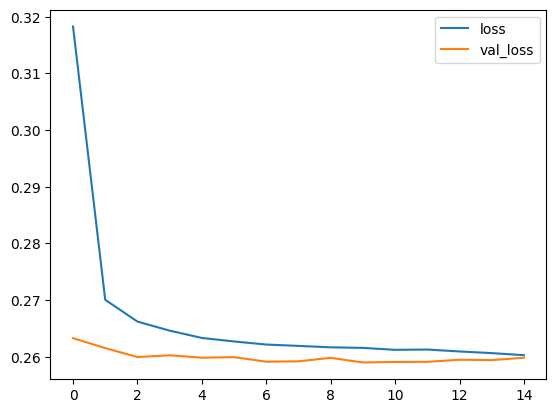

In [105]:
losses.plot()

# Evaluating Model Performance.

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

In [107]:
predictions = model.predict(X_test)

2476/2476 [==============================] - 8s 3ms/step


In [109]:
pred=np.where(predictions>0.5,1,0)

In [111]:
print(confusion_matrix(y_test,pred),'/n')
print(classification_report(y_test,pred))

[[ 6703  8790]
 [    1 63712]] /n
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15493
           1       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.94      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



# TASK: Given the customer below, would you offer this person a loan?


In [118]:
import random
random.seed(101)
random_int=random.randint(0,len(df))
new_customer=df.drop('loan_repaid',axis=1).iloc[random_int]

In [127]:
scaled_data=scaler.transform(new_customer.values.reshape(1,76))

C:\Users\debna\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [128]:
pred=model.predict(scaled_data)
pred=np.where(pred>0.5,1,0)
pred

1/1 [==============================] - 0s 89ms/step


array([[1]])

 did this person actually end up paying back their loan?

In [129]:
df.iloc[random_int]['loan_repaid']

1